# MASLD HLO model systems - scRNA-seq analysis work flow

This notebook will guide through quality control and processing of 10X scRNA-seq data from Human Liver Organoids (HLOs) for the stratification of
different treatments to model MASLD (metabolic dysfunction-associated steatotic liver disease).

*Note: The steps of the workflow displayed here for demonstration are normally coded into loops, functions, and variables in our package (see this github repository).*

*Original study*:
**Hess, A. et al. Single cell transcriptomic landscapes of human liver organoids stratify models of non-alcoholic fatty liver disease. 2022.07.19.500693 Preprint at https://doi.org/10.1101/2022.07.19.500693 (2023).**

# Run requirements
I usually go for **60 GB RAM** on a remote server, **python >= 3.6**, with **scanpy** and **numpy** installed.

*Note: on a normal laptop (unless it's a very fancy one), the operations may take very long to execute and probably will get killed due to high memory requirements.* 

# Data availability

## Processed data
We provide **3 AnnData objects (.h5ad)** :

1. **day21.h5ad** - Processed **Day 21 ULA-HLOs** (manuscript version)
2. **os.h5ad** - Processed **OS-HLOs** treated with **OA, PA, or TGF-β1** (manuscript version)
3. **masld-hlos_merged.h5ad** - Unprocessed merged data (to demonstrate filtering and pre-processing in this notebook)

Data are available for download as supplementary files at the Gene Expression Omnibus (GEO) under **GSE207889**. Before startig, make sure to unzip the files (e.g. gunzip *.gz). 

*Note: The third AnnData object is already merged and doublet score-annotated. It contains HLO cells from different treatments to model MASLD (OA, PA, TGF-B1) and culture conditions (OS, ULA).*

## Raw data

Raw data for single-cell RNA sequencing are available at Gene Expression Omnibus (GEO) under the accession **GSE207889**.

# 1. Reproducing manuscript figures

## 1.1 ULA-HLOs (Fig. 1d)
To reproduce plots from the publication, simply load the first two AnnData objects.
We start with day 21 ULA HLOs, and generate a ForceAtlas2 representation with cell types and some liver genes colored.

AnnData object with n_obs × n_vars = 16835 × 5000
    obs: 'sample', 'doublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_mito', 'pct_lnc', 'pct_ribo', 'pct_mir', 'phase', 'condition', 'leiden_0.1', 'culture', 'celltype_scTypedb', 'celltype_literature'
    var: 'feature_types', 'n_cells', 'n_counts', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_ids'
    uns: 'celltype_literature_colors', 'celltype_scTypedb_colors', 'draw_graph', 'hvg', 'leiden', 'neighbors', 'pca', 'umap', 'wilcoxon_leiden_0.1'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'


/pkg/python-3.10.12-0/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/pkg/python-3.10.12-0/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


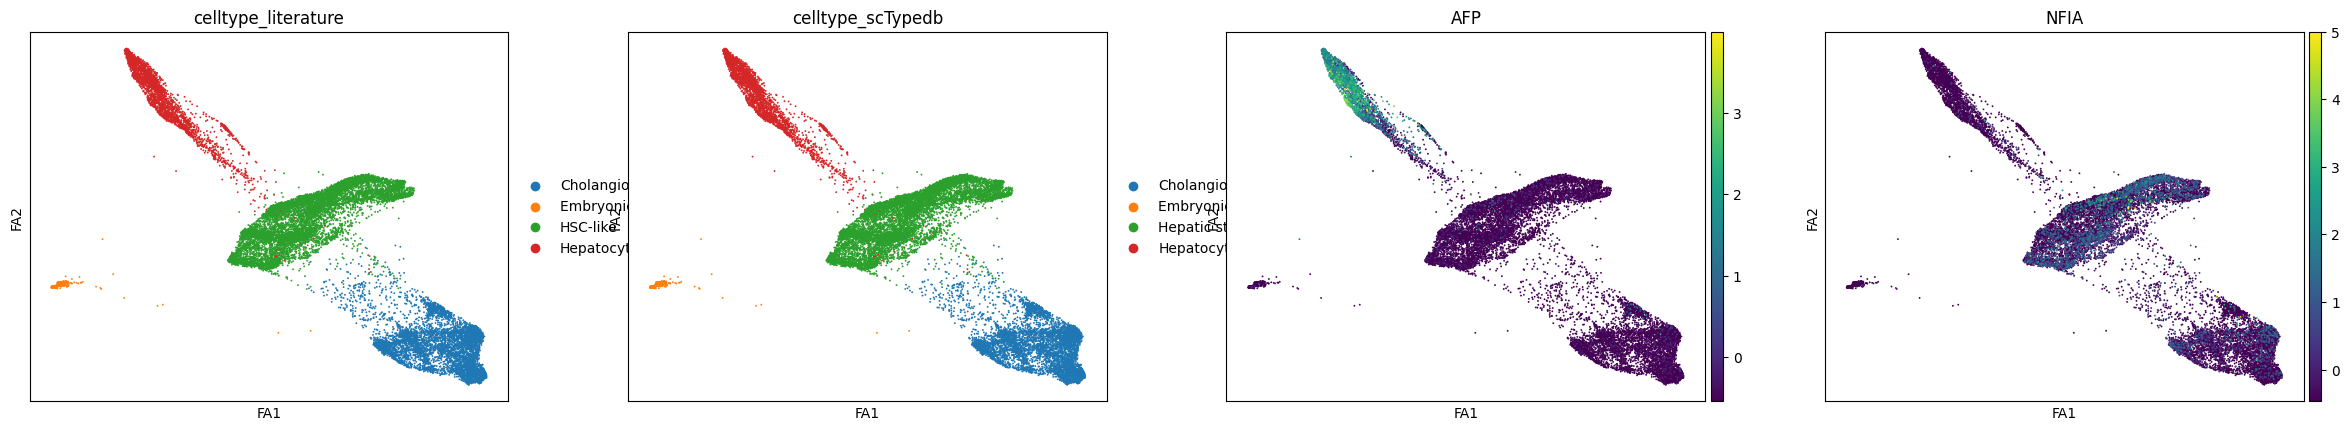

In [39]:
# 0.1 Load the ULA .h5ad file
adata_path = "./H5ADS_MASLD/day21.h5ad"
adata = sc.read_h5ad(adata_path)
print(adata)

sc.pl.draw_graph(adata,
                 color=["celltype_literature", "celltype_scTypedb", "AFP", "NFIA"],
                 layer="scaled",
                 show=True)

## 1.2 OS-HLOs (Fig. 2b,d & Fig. 4a,b)
Now let's do the same for OS-HLOs...

AnnData object with n_obs × n_vars = 82467 × 5000
    obs: 'sample', 'doublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_mito', 'pct_lnc', 'pct_ribo', 'pct_mir', 'phase', 'culture', 'leiden_0.1', 'condition', 'controlstatus', 'celltype_category', 'detailed_condition', 'celltype_scTypedb'
    var: 'feature_types', 'n_cells', 'n_counts', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'gene_ids'
    uns: 'celltype_category_colors', 'celltype_scTypedb_colors', 'draw_graph', 'hvg', 'leiden', 'neighbors', 'pca', 'umap', 'wilcoxon_leiden_0.1'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'


/pkg/python-3.10.12-0/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/pkg/python-3.10.12-0/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


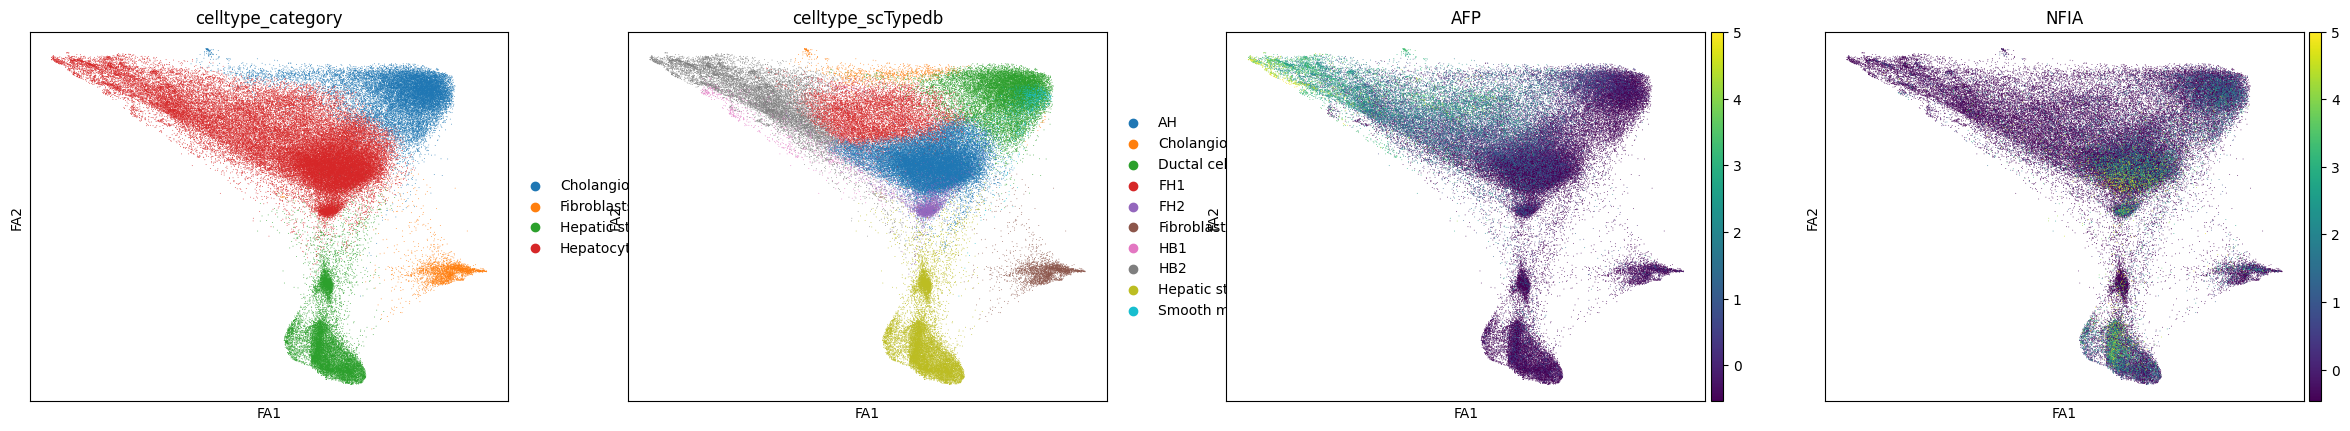

In [40]:
# 0.1 Load the OS h5ad file
adata_path = "./H5ADS_MASLD/os.h5ad" 
adata = sc.read_h5ad(adata_path)
print(adata)

sc.pl.draw_graph(adata,
                 color=['celltype_category','celltype_scTypedb', 'AFP', 'NFIA'],
                 layer="scaled",
                 show=True)


In [41]:
import scanpy as sc
import numpy as np

# 0.1 Load the h5ad file
adata_path = "./H5ADS_MASLD/masld-hlos_merged.h5ad"
adata = sc.read_h5ad(adata_path)
print(adata)
print(adata.obs["condition"].value_counts())
print(adata.obs["culture"].value_counts())

AnnData object with n_obs × n_vars = 138053 × 31811
    obs: 'sample', 'doublet_score', 'condition', 'culture'
    var: 'gene_ids'
condition
CTRL-TGFB1    21249
Day21         21067
CTRL          17998
Day34         17867
PA            17707
TGFB1         14103
CTRL-PA       10612
CTRL-OA       10382
OA             7068
Name: count, dtype: int64
culture
OS     99119
ULA    38934
Name: count, dtype: int64


# 2. Recapitulating QC and pre-processing 

Step 1: Now, we filter out cells with less than 500 genes, and remove genes expressed in less than 10 cells.

In [42]:
# 1. Cell filtering
print(f"--- Filtering {adata.shape[0]} cells for having at least 500 genes.")
sc.pp.filter_cells(adata, min_genes=500)
print(f"--- After filtering: {adata.shape[0]} cells.")

# 2. Gene filtering
print(f"--- Filtering {adata.shape[1]} genes for being expressed in at least 10 cells.")
sc.pp.filter_genes(adata, min_cells=10)
print(f"--- After filtering: {adata.shape[1]} genes.")
#116394 cells × 23742

--- Filtering 138053 cells for having at least 500 genes.
--- After filtering: 122729 cells.
--- Filtering 31811 genes for being expressed in at least 10 cells.
--- After filtering: 23742 genes.


In [43]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata,
                           inplace=True,
                           log1p=False)

# Add some transcript classes (custom)
GENECLASSES = {"MT-": "mito", "LNC": "lnc", ("RPS", "RPL"): "ribo", "MIR": "mir"}

for geneclass in GENECLASSES:
    genes_of_interest = adata.var_names.str.startswith(geneclass)
    adata.obs[f'frac_{GENECLASSES[geneclass]}'] = (
            np.sum(adata[:, genes_of_interest].X, axis=1) /
            np.sum(adata.X, axis=1))
    
vals = [e for e in ["n_genes_by_counts", 'total_counts',
                    "frac_mito", "frac_ribo", "frac_lnc", "frac_mir",
                    "doublet_score"] if e in adata.obs]
print(f"Available metrics: {vals}")

Available metrics: ['n_genes_by_counts', 'total_counts', 'frac_mito', 'frac_ribo', 'frac_lnc', 'frac_mir', 'doublet_score']


We will now inspect QC metrics visually, starting with scatter plots.

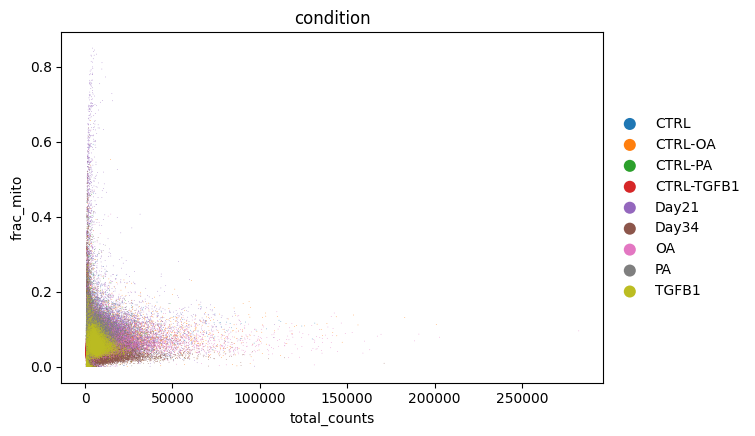

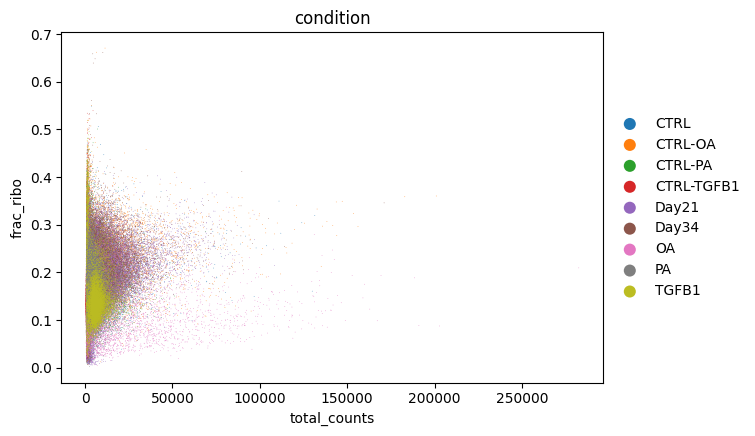

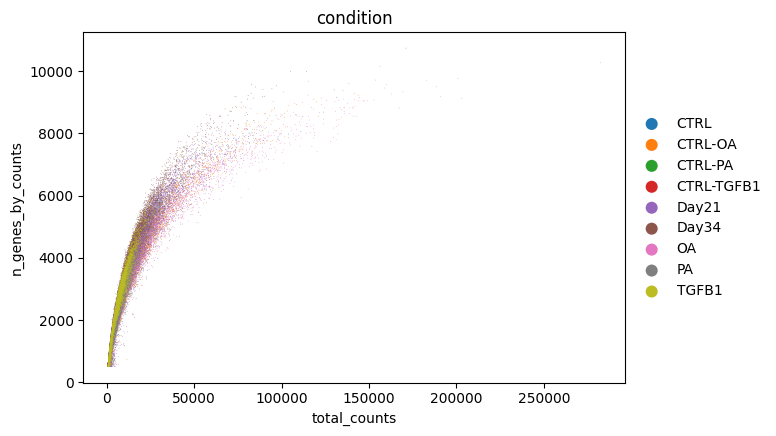

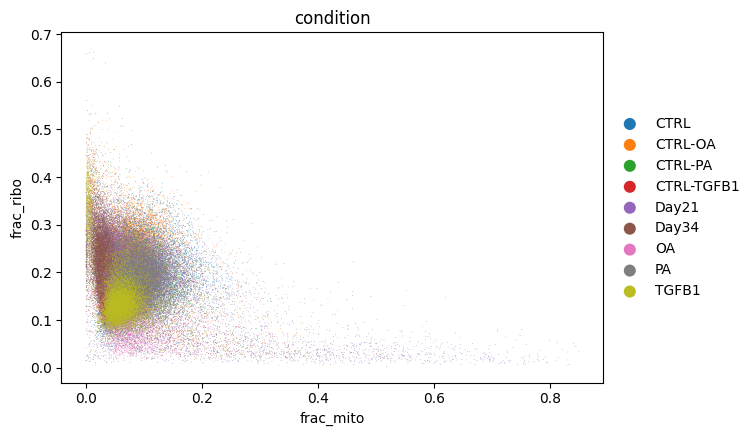

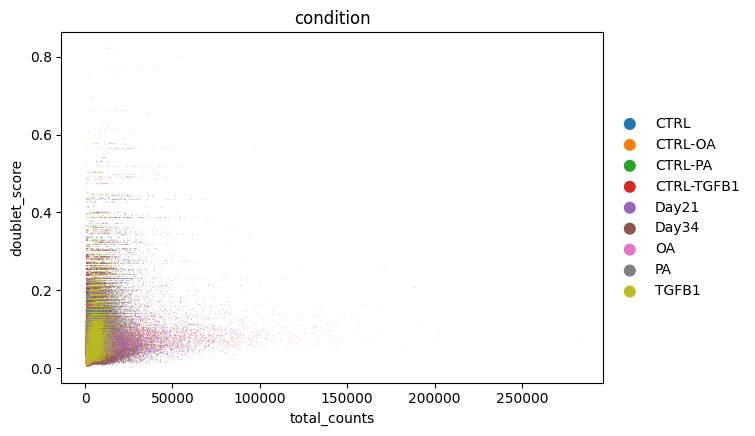

In [44]:
group_by = "condition"

value_pairs = [('total_counts','frac_mito'), ('total_counts','frac_ribo'), 
               ('total_counts','n_genes_by_counts'), ('frac_mito','frac_ribo'),
               ('total_counts','doublet_score')]

for x,y in value_pairs:
    sc.pl.scatter(adata, x=x, y=y, color=group_by)

... and now look at violin plots, in particular at mitochondrial/ribosomal transcript fraction and total counts:

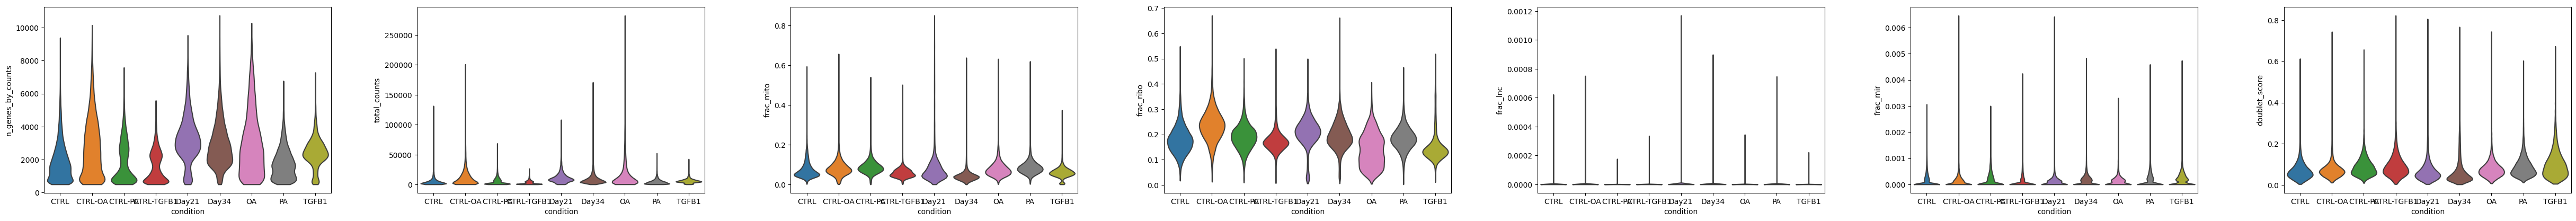

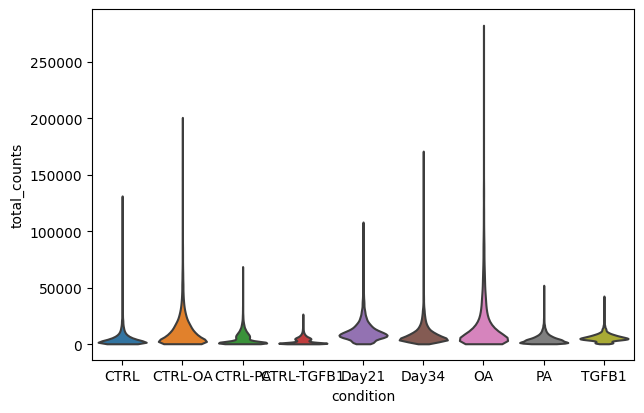

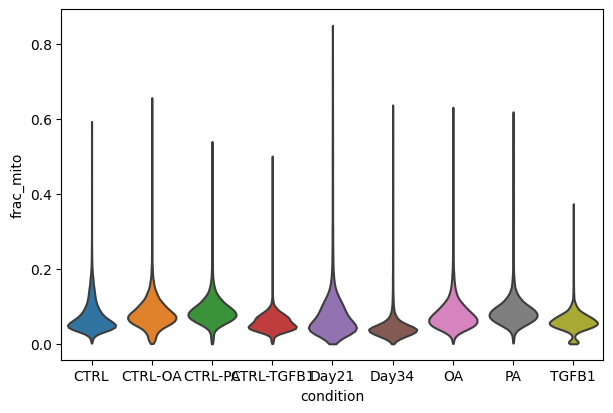

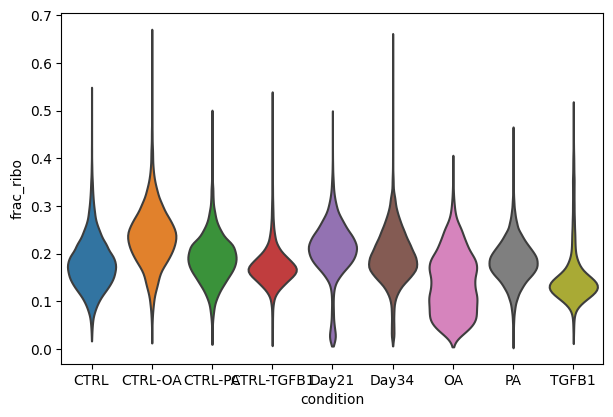

In [45]:
# Generate QC violin plots (Situation before further filtering)
sc.pl.violin(adata, vals,
             jitter=0.4,
             groupby=group_by,
             show=True,
             stripplot=False)

# Let's look at % mito, ribo reads and counts in particular
sc.pl.violin(adata, "total_counts",
             jitter=0.4,
             groupby=group_by,
             show=True,
             stripplot=False)

sc.pl.violin(adata, "frac_mito",
             jitter=0.4,
             groupby=group_by,
             show=True,
             stripplot=False)

sc.pl.violin(adata, "frac_ribo",
             jitter=0.4,
             groupby=group_by,
             show=True,
             stripplot=False)


... We can visually determine that all samples have their large bulk of cells fit < 0.2 mito fraction, < 0.4 ribo fraction (see reference: https://kb.10xgenomics.com/hc/en-us/articles/218169723-What-fraction-of-reads-map-to-ribosomal-proteins-), and < 30K total reads.

# Count and mito filtering
Accordingly, we will now filter cells so that counts, mitochondrial transcripts, and ribosomal transcripts will approximately fit into the 1.5 x inter-quartile range of the data distribution (~ the body of the violin) in order to render samples more comparable. The minimum count requirement is set to 500 in order to avoid counting empty drops as cells.

--- Count filtering, 122729 cells.


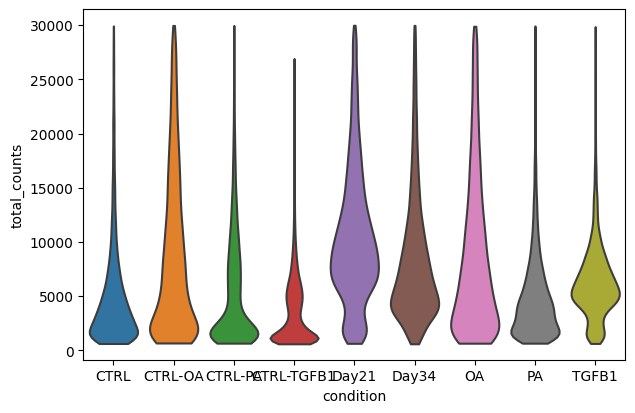

--- After count filtering: 119011 cells.
--- Mito filtering, 119011 cells.


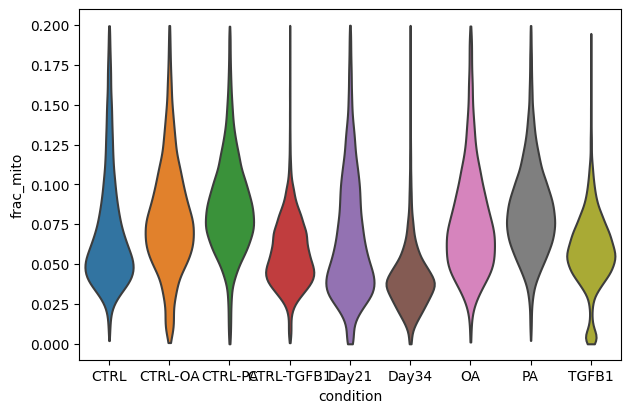

--- After mito filtering: 116855 cells.
Ribo filtering, 116855 cells.


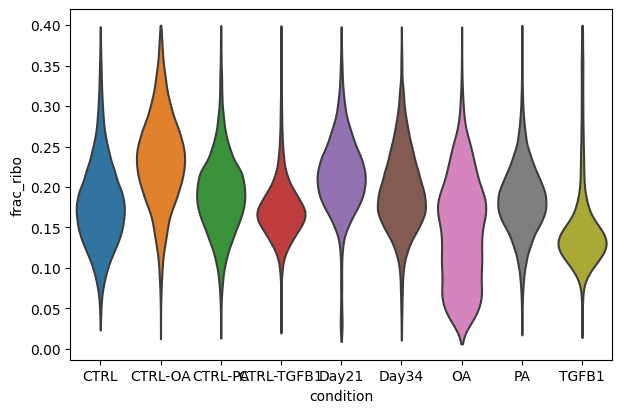

--- After ribo filtering: 116497 cells.
(116497, 23742)


In [46]:
COUNT_LOWER, COUNT_UPPER = 500, 30000
MITO_CUTOFF = 0.2
RIBO_UPPER = 0.4

# Count filtering (post plot inspection)
print(f"--- Count filtering, {adata.shape[0]} cells.")
keep = (adata.obs["total_counts"] < COUNT_UPPER)
adata = adata[keep, :]
keep = (adata.obs["total_counts"] > COUNT_LOWER)
adata = adata[keep, :]
sc.pl.violin(adata, "total_counts",
             jitter=0.4,
             groupby=group_by,
             show=True,
             stripplot=False)
print(f"--- After count filtering: {adata.shape[0]} cells.")

# Mito filtering
print(f"--- Mito filtering, {adata.shape[0]} cells.")
keep = (adata.obs["frac_mito"] < MITO_CUTOFF)
adata = adata[keep, :]
sc.pl.violin(adata, "frac_mito",
             jitter=0.4,
             groupby=group_by,
             show=True,
             stripplot=False)
print(f"--- After mito filtering: {adata.shape[0]} cells.")

# Ribo filtering
print(f"Ribo filtering, {adata.shape[0]} cells.")
keep = (adata.obs["frac_ribo"] < RIBO_UPPER)
adata = adata[keep, :]
sc.pl.violin(adata, "frac_ribo",
             jitter=0.4,
             groupby=group_by,
             show=True,
             stripplot=False)
print(f"--- After ribo filtering: {adata.shape[0]} cells.")

print(adata.shape)

Finally, we want to filter by doublet likelihood as calculated beforehands with Scrublet (on raw cellranger outputs).

# Doublet filetering

Doublet filtering 116497 cells


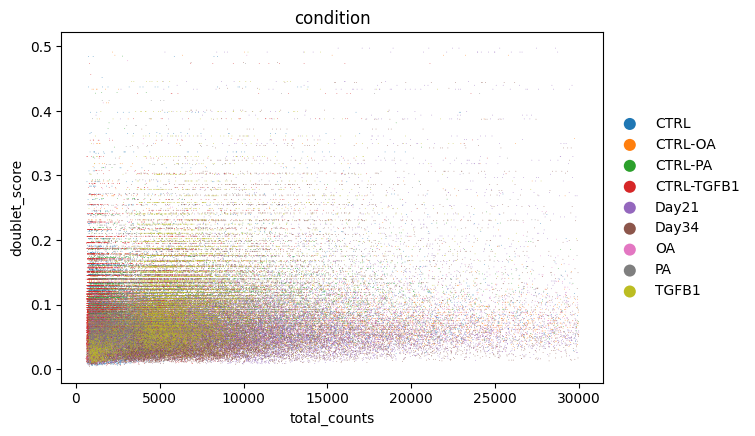

--- After doublet clearing: 116394 cells.
condition
CTRL-TGFB1    17958
Day21         16835
Day34         16375
PA            15822
CTRL          14899
TGFB1         12773
CTRL-PA        8829
CTRL-OA        7616
OA             5287
Name: count, dtype: int64
sample
49          12535
50           9527
SM-L3XWE     9382
51           8431
65           8187
64           7635
53           6845
47           6033
52           5928
63           5643
SM-L3XWF     5517
45           5472
46           5330
SM-L3XWG     5012
48           3840
62           3186
SM-L3XWJ     2770
SM-L3XWH     2604
SM-L3XWI     2517
Name: count, dtype: int64
culture
OS     83184
ULA    33210
Name: count, dtype: int64
(116394, 23742)


In [47]:
# 8. Doublet filtering
print(f"Doublet filtering {adata.shape[0]} cells")
keep = (adata.obs['doublet_score'] < 0.5)
adata = adata[keep, :]
sc.pl.scatter(adata, x='total_counts', y='doublet_score', color=group_by)
print(f"--- After doublet clearing: {adata.shape[0]} cells.")
print(adata.obs["condition"].value_counts())
print(adata.obs["sample"].value_counts())
print(adata.obs["culture"].value_counts())
print(adata.shape)


# Normalization, logarithmization, scaling, and selection of highly variable genes

Further steps include normalization, logarithmization, and the selection of highly variable genes.


--- PP
    (116394, 23742)
--- HVG


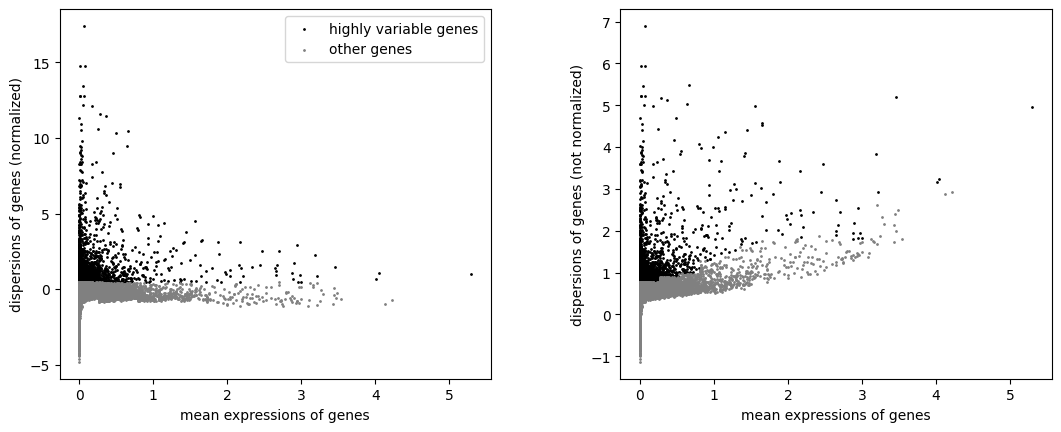

--- Scaling
After HVG selection: 100019 cells, 5000 highly variable genes, total: 23742


In [48]:
# PP
print("--- PP")
print("   ", adata.X.shape)
adata.raw = adata
sc.pp.normalize_total(adata,
                      exclude_highly_expressed=True,
                      max_fraction=0.1)
sc.pp.log1p(adata)

print("--- HVG")
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
sc.pl.highly_variable_genes(adata)

adata = adata[:, adata.var.highly_variable]

print("--- Scaling")
adata.layers['scaled'] = sc.pp.scale(adata,
                                     copy=True,
                                     max_value=5).X

# We will analyze Day21 ULA and all OS samples for this study.
adata = adata[(adata.obs['condition'] != "Day34"), :]
print(f"After HVG selection: {adata.X.shape[0]} cells, {adata.X.shape[1]} highly variable genes, total: {adata.raw.shape[1]}")
print(adata)

We have demonstrated the QC-based filtering arriving at 100,019 cells × 23,742 genes. This equals 83,184 OS cells (see for Dataset EV10 for further processing) and 16,835 ULA cells. After highly variable gene selection, 5,000 genes are used for major analyses, with all genes remaining available in the adata.raw slot.
